In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import plot_roc_curve

# Set display options and style
pd.set_option('display.max_columns', 500)
sns.set()
sns.set_style('darkgrid')

In [2]:
# Read the dataset
df = pd.read_csv('Customer-Churn.csv')

In [3]:
# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=123)

In [4]:
# A1
train.reset_index(drop=True, inplace=True)
train.head()
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# A2
train.drop(['customerID'], axis=1, inplace=True)
train.dtypes
train['TotalCharges'].unique()
train[train['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1343,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2371,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
3880,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4054,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4189,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
5039,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5528,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
5629,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [6]:
# A3
train['TotalCharges'] = train['TotalCharges'].replace(' ', np.nan)
train[train['TotalCharges'] == ' ']
train[train['TotalCharges'] == 'null']
train.head()
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [7]:
# Convert 'TotalCharges' to float
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [8]:
# A4
cat = []
for i in train.columns:
    if train[i].dtype == 'O':
        cat.append(i)

In [9]:
# A5
train.drop_duplicates(keep='first', inplace=True, ignore_index=True)
train.duplicated().sum()

# A6
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# A7
for i in cat:
    if train[i].dtype == 'O':
        print(f"{i} has {train[i].nunique()} categories\nThey are:\n{train[i].unique()}\n")

cols = train.columns

gender has 2 categories
They are:
['Male' 'Female']

Partner has 2 categories
They are:
['No' 'Yes']

Dependents has 2 categories
They are:
['No' 'Yes']

PhoneService has 2 categories
They are:
['Yes' 'No']

MultipleLines has 3 categories
They are:
['No' 'No phone service' 'Yes']

InternetService has 3 categories
They are:
['Fiber optic' 'DSL' 'No']

OnlineSecurity has 3 categories
They are:
['No' 'Yes' 'No internet service']

OnlineBackup has 3 categories
They are:
['No' 'Yes' 'No internet service']

DeviceProtection has 3 categories
They are:
['No' 'Yes' 'No internet service']

TechSupport has 3 categories
They are:
['No' 'Yes' 'No internet service']

StreamingTV has 3 categories
They are:
['No' 'Yes' 'No internet service']

StreamingMovies has 3 categories
They are:
['No' 'Yes' 'No internet service']

Contract has 3 categories
They are:
['Month-to-month' 'Two year' 'One year']

PaperlessBilling has 2 categories
They are:
['Yes' 'No']

PaymentMethod has 4 categories
They are:
['Elect

In [11]:
# A8
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']
cat1 = [col for col in X_train.columns if X_train[col].dtype == 'O']

encoder = OneHotEncoder(drop='first', dtype=int)
enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
enc_data.columns = encoder.get_feature_names_out(cat1)

X_train = X_train.join(enc_data)
X_train.drop(cat1, axis=1, inplace=True)

col1 = X_train.columns

In [12]:
# A9
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=col1)

<Axes: >

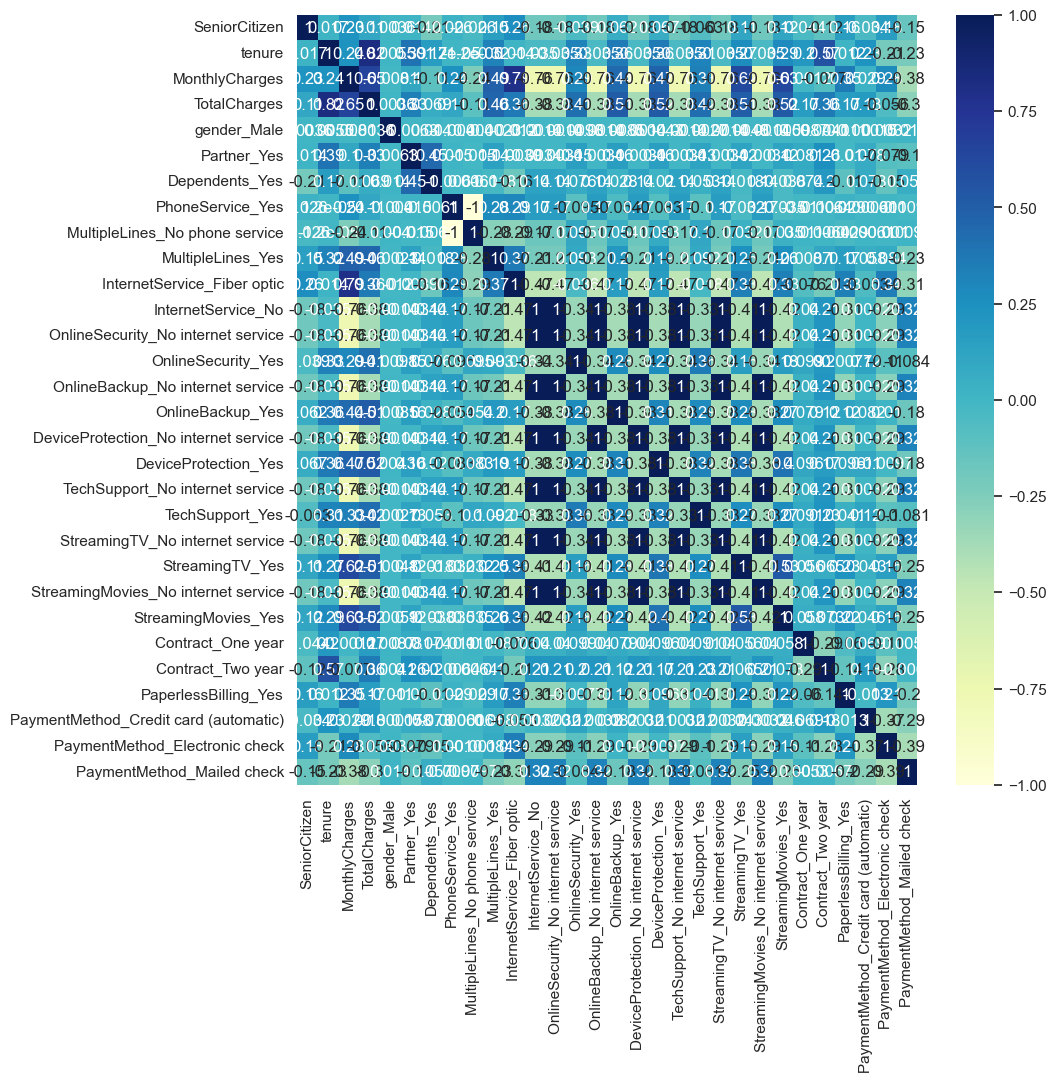

In [13]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
cors = X_train.corr()
sns.heatmap(cors, annot=True, cmap='YlGnBu')

<Axes: >

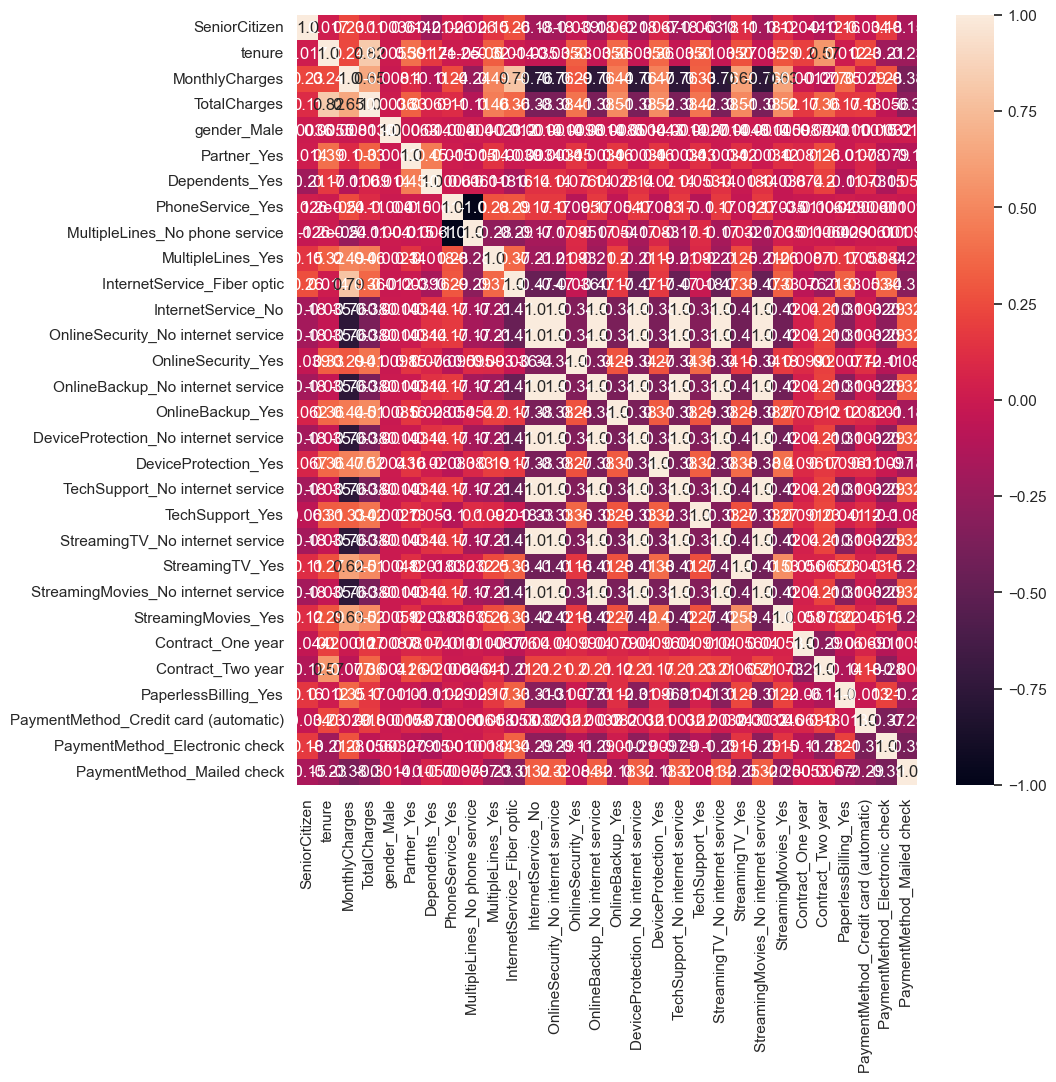

In [14]:
# Feature selection with correlation
mask = cors[(cors >= 0.23) | (cors <= 0.83)]

plt.figure(figsize=(10, 10))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2')



In [15]:
# Train a Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [16]:
# Prepare the test data
def prepare(df):
    df.reset_index(drop=True, inplace=True)
    df.drop(['customerID'], axis=1, inplace=True)
    df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)

    X_test = df.drop(['Churn'], axis=1)
    y_test = df['Churn']

    cat1 = [col for col in X_test.columns if X_test[col].dtype == 'O']

    enc_data = pd.DataFrame(encoder.transform(X_test[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out(cat1)

    X_test = X_test.join(enc_data)
    X_test.drop(cat1, axis=1, inplace=True)

    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns=col1)

    return X_test, y_test

X_test, y_test = prepare(test)

In [17]:
# Define a function to choose a machine learning model
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'LR':
        model = LogisticRegression()
    elif input_ml_algo == 'KNN':
        model = KNeighborsClassifier()
    return model


Accuracy Score:
 0.786628733997155

Confusion Matrix:
 [[917  95]
 [205 189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1012
           1       0.67      0.48      0.56       394

    accuracy                           0.79      1406
   macro avg       0.74      0.69      0.71      1406
weighted avg       0.77      0.79      0.77      1406



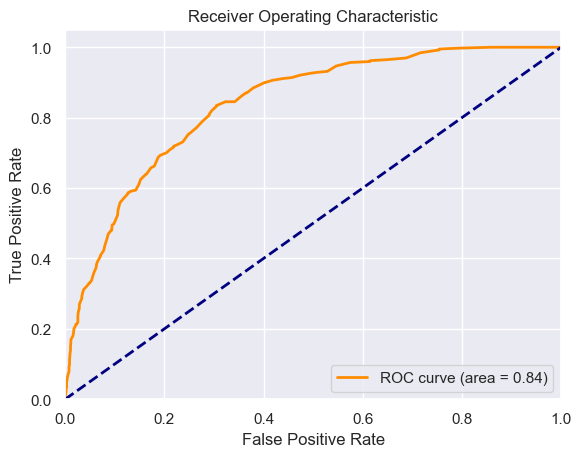

In [18]:
# Define a function for performance evaluation
def performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Use LabelEncoder to encode 'Yes' and 'No' to 1 and 0 in y_train and y_test
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Use the model_to_use function to select a model and evaluate its performance
model = model_to_use('RF')
performance(model, X_train, y_train, X_test, y_test)

# Plot ROC curve using RandomForestClassifier
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [19]:
# Use the model_to_use function to select a model and evaluate its performance
model = model_to_use('RF')
performance(model, X_train, y_train, X_test, y_test)


Accuracy Score:
 0.7908961593172119

Confusion Matrix:
 [[922  90]
 [204 190]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1012
           1       0.68      0.48      0.56       394

    accuracy                           0.79      1406
   macro avg       0.75      0.70      0.71      1406
weighted avg       0.78      0.79      0.78      1406

